In [1]:
# Feel free to use pathlib library instead of the os library if you like pathlib better.
# pathlib is more modern.
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import time

In [2]:
imagedirectory='./lfw1000'

In [3]:
image = Image.open(os.path.join(imagedirectory, os.listdir(imagedirectory)[0]))

In [4]:
nrows, ncolumns = image.height, image.width

In [5]:
nimages=len(os.listdir(imagedirectory))

In [6]:
X=np.empty([nrows*ncolumns,nimages])

In [7]:
X.shape

(4096, 1071)

In [8]:
for i, filename in enumerate(os.listdir(imagedirectory)):
    image = Image.open(os.path.join(imagedirectory, filename))
    X[:,i] = np.asarray(image.getdata())

In [9]:
U,S,V=np.linalg.svd(X)

In [10]:
eigenface1=U[:,0].reshape(nrows, ncolumns)
eigenface1.shape

(64, 64)

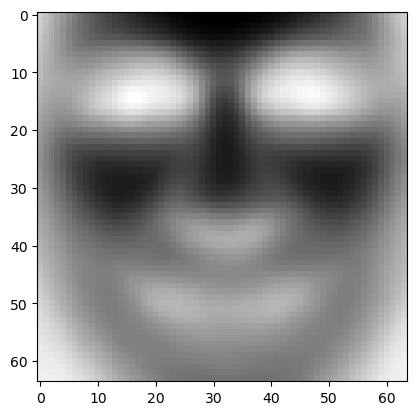

In [11]:
plt.imshow(eigenface1,cmap='gray')

In [12]:
df=pd.DataFrame(U[:,0])
df.to_csv("eigenface.csv")

In [13]:
U.shape

(4096, 4096)

In [14]:
errors=[]
time_start=time.time()
for k in range(1,101):
    error=0
    E=U[:,:k]
    proj=E@np.linalg.pinv(E)
    ematrix=X-proj@X
    for i in range(ematrix.shape[1]):
        error=error+np.linalg.norm(ematrix[:,i])
    error=error/X.shape[1]
    errors.append(error)
time_end=time.time()
print('time cost',time_end-time_start,'s')

time cost 305.8535490036011 s


In [15]:
# errors

In [16]:
# #too slow
# errors=[]
# time_start=time.time()
# for k in range(1,101):
#     E=U[:,:k]
#     proj=E@np.linalg.pinv(E)
#     error=0
#     for i in range(X.shape[1]):
#         curimage=X[:,i]
#     #     print(curimage.shape)
#     #     print(E.shape)
#         error=error+np.linalg.norm(curimage-proj@curimage)
#     error=error/X.shape[1]
#     errors.append(error)
# time_end=time.time()
# print('time cost',time_end-time_start,'s')

[]

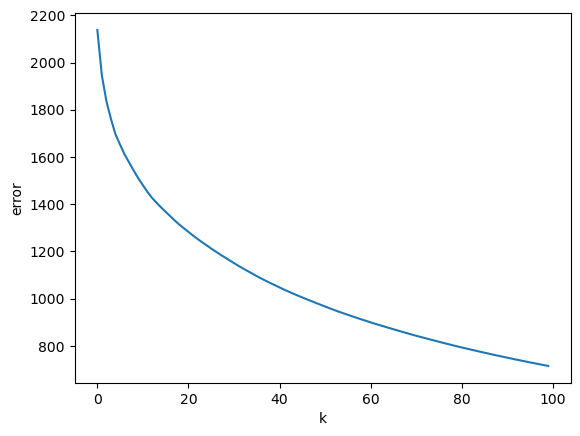

In [17]:
fig,ax=plt.subplots()
ax.plot(range(100),errors)
ax.set_xlabel("k")
ax.set_ylabel("error")
plt.plot()

In [18]:
print("The mean reconstruction error using k=100 is {e}".format(e=errors[99]))

The mean reconstruction error using k=100 is 715.4452217286055


In [19]:
e1=U[:,0]
e2=U[:,1]

In [20]:
np.dot(e1,e2)

2.949029909160572e-17

since <e1,e2> is so small, we can say e1 and e2 are orthogonal

In [21]:
# angle=np.arccos(np.dot(e1,e2)/(np.linalg.norm(e1)*np.linalg.norm(e2)))